In [ ]:
!pip install ucimlrepo

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from ucimlrepo import fetch_ucirepo
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Input
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [ ]:
# Enable GPU/TPU
def setup_tpu():
    try:
        tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
        tf.config.experimental_connect_to_cluster(tpu)
        tf.tpu.experimental.initialize_tpu_system(tpu)
        strategy = tf.distribute.TPUStrategy(tpu)
    except ValueError:
        strategy = tf.distribute.get_strategy()
    return strategy

strategy = setup_tpu()

In [ ]:
# Fetch dataset from UCI repository
primary_tumor = fetch_ucirepo(id=83)
X = primary_tumor.data.features
y = primary_tumor.data.targets

In [ ]:
# Data exploration
print(X.head())
print(y.head())
print(X.info())
print(X.describe())
print(X.isnull().sum())  # Check missing values

   age  sex  histologic-type  degree-of-diffe  bone  bone-marryow  lung  \
0    1  1.0              NaN              3.0     2             2     1   
1    1  1.0              NaN              3.0     2             2     2   
2    1  2.0              2.0              3.0     1             2     2   
3    1  2.0              NaN              3.0     1             2     1   
4    1  2.0              NaN              3.0     1             2     1   

   pleura  peritoneum  liver  brain  skin  neck  supraclavicular  axillar  \
0       2           2      2      2   2.0     2                2      2.0   
1       2           2      1      2   2.0     2                1      2.0   
2       2           2      2      2   2.0     2                2      2.0   
3       1           2      2      2   2.0     2                2      2.0   
4       1           2      2      2   2.0     2                2      2.0   

   mediastinum  abdominal  
0            2          2  
1            1          2  
2 

In [ ]:
# Handling missing values
X = X.dropna()
y = y.loc[X.index]  # Ensure target variable matches filtered dataset

In [ ]:
# Encode categorical variables
label_encoders = {}
for col in X.columns:
    le = LabelEncoder()
    X.loc[:, col] = le.fit_transform(X[col].astype(str))
    label_encoders[col] = le

In [ ]:
# Encode target variable
y = LabelEncoder().fit_transform(y.values.ravel())

In [ ]:
# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Scale features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Convert y to categorical
num_classes = len(np.unique(y))
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

In [ ]:
# Model training settings
optimizers = [Adam, SGD, RMSprop]
learning_rates = [0.001, 0.01, 0.1]
results = []

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step
Optimizer: Adam, Learning Rate: 0.001
              precision    recall  f1-score   support

           0       0.47      1.00      0.64         7
           1       0.67      1.00      0.80         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.50      0.20      0.29         5
           8       0.50      0.67      0.57         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.33      1.00      0.50         1
          17       0.00      0.00      0.00         2

    accuracy                           0.48        27
   macro avg       0.25      0.39      0.28        27
weighted avg       0.33      0.48      0.36        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


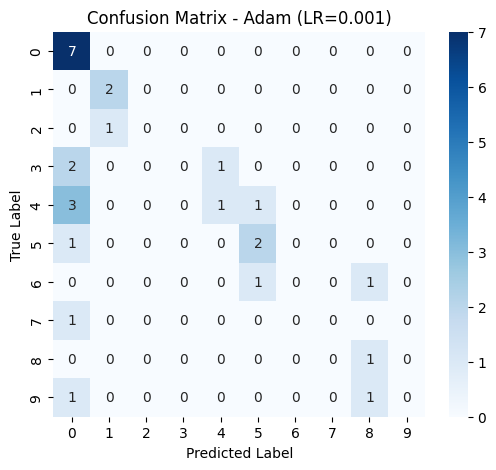

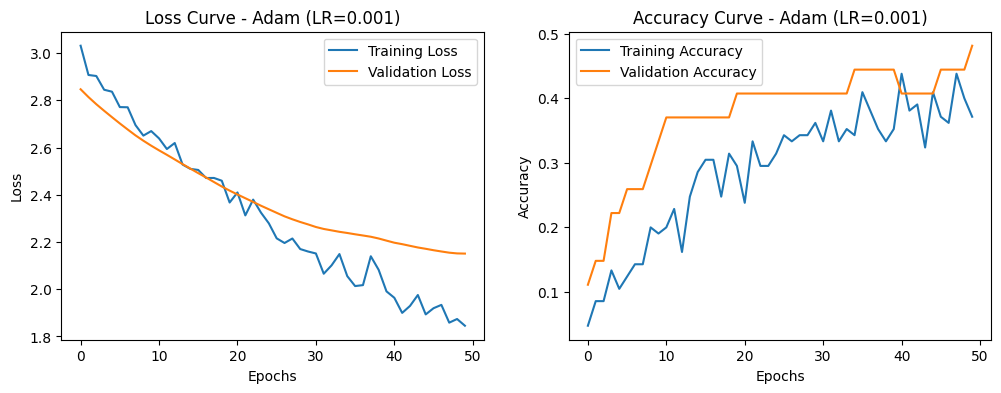

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 179ms/step
Optimizer: Adam, Learning Rate: 0.01
              precision    recall  f1-score   support

           0       0.67      0.86      0.75         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.20      0.33      0.25         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          15       0.00      0.00      0.00         0
          17       0.00      0.00      0.00         2

    accuracy                           0.37        27
   macro avg       0.22      0.25      0.23        27
weighted avg       0.31      0.37      0.33        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

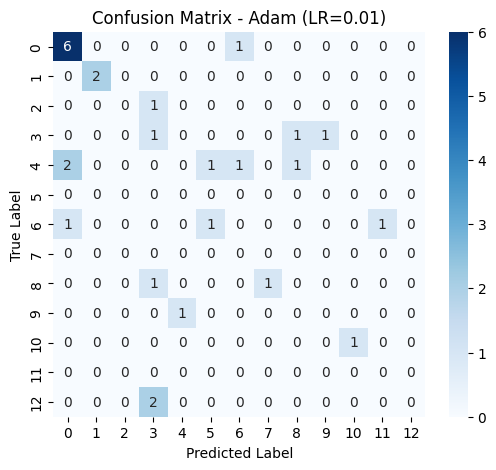

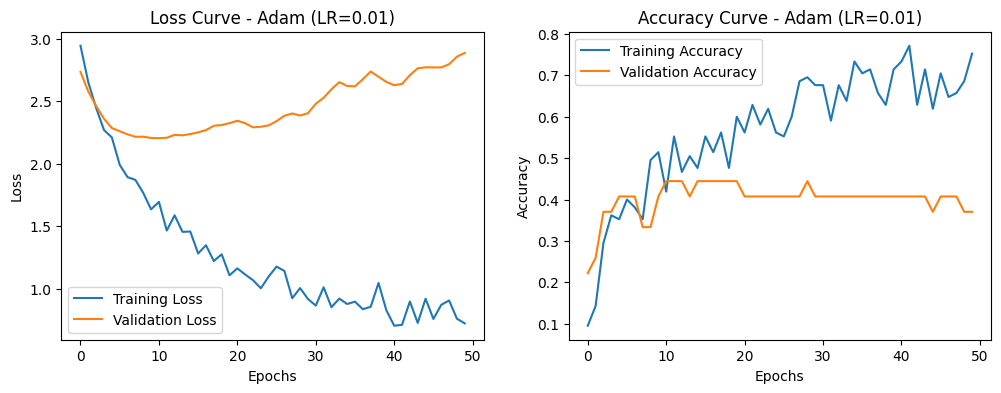

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 184ms/step
Optimizer: Adam, Learning Rate: 0.1
              precision    recall  f1-score   support

           0       0.29      1.00      0.45         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         2

    accuracy                           0.37        27
   macro avg       0.23      0.30      0.25        27
weighted avg       0.19      0.37      0.23        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


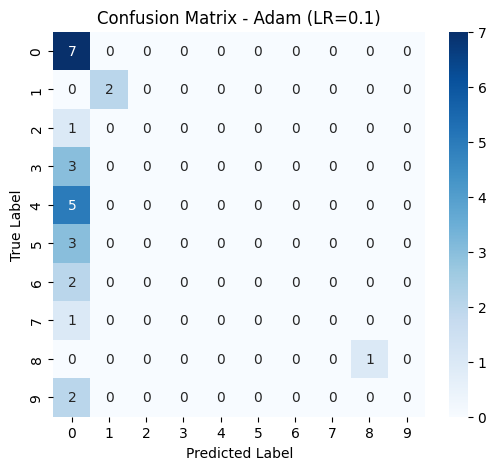

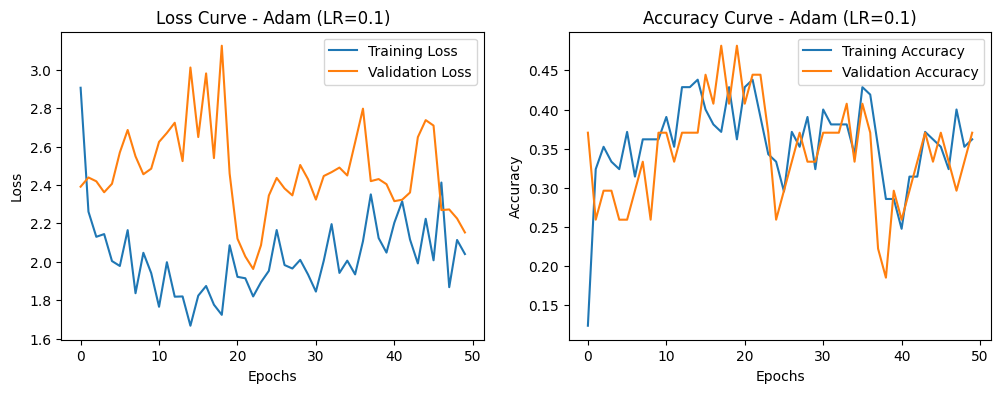

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 175ms/step
Optimizer: SGD, Learning Rate: 0.001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       7.0
           1       0.00      0.00      0.00       2.0
           2       0.00      0.00      0.00       1.0
           3       0.00      0.00      0.00       3.0
           4       0.00      0.00      0.00       5.0
           7       0.00      0.00      0.00       0.0
           8       0.00      0.00      0.00       3.0
           9       0.00      0.00      0.00       0.0
          11       0.00      0.00      0.00       2.0
          13       0.00      0.00      0.00       1.0
          14       0.00      0.00      0.00       1.0
          15       0.00      0.00      0.00       0.0
          16       0.00      0.00      0.00       0.0
          17       0.00      0.00      0.00       2.0

    accuracy                           0.00      27.0
   macro avg       0.00      0.00      0.00      27.0
weig

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

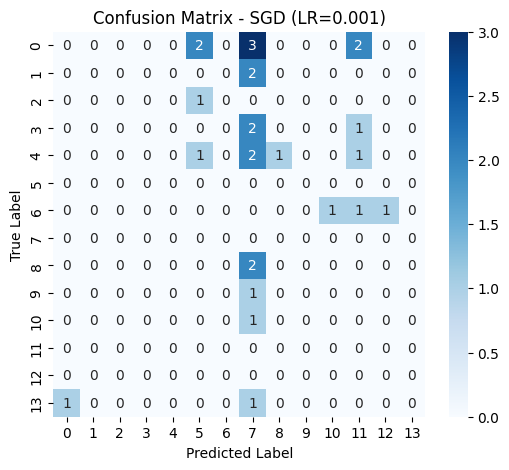

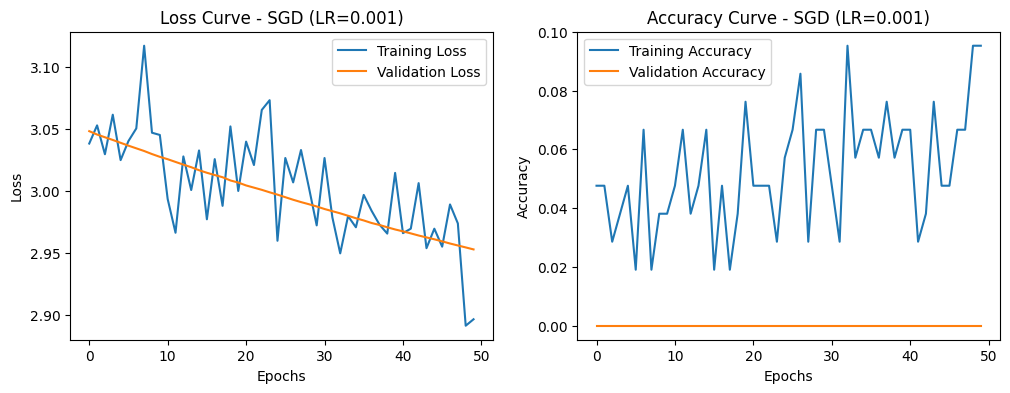

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 290ms/step
Optimizer: SGD, Learning Rate: 0.01
              precision    recall  f1-score   support

           0       0.29      1.00      0.45         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       1.00      0.33      0.50         3
           4       0.00      0.00      0.00         5
           8       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2

    accuracy                           0.37        27
   macro avg       0.23      0.23      0.20        27
weighted avg       0.26      0.37      0.25        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


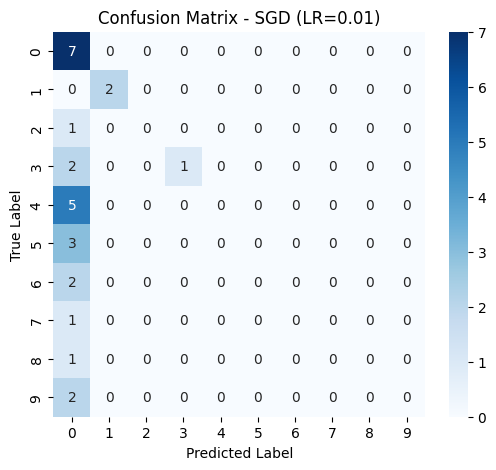

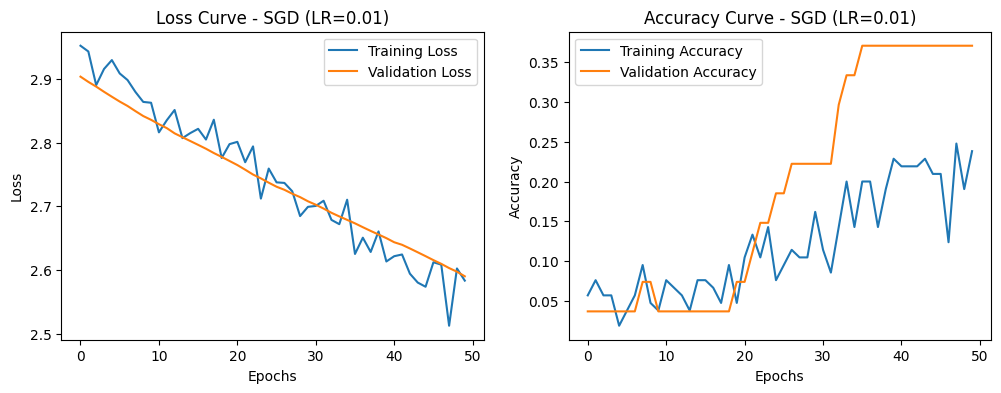

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 176ms/step
Optimizer: SGD, Learning Rate: 0.1
              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       1.00      0.20      0.33         5
           8       0.25      0.33      0.29         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       1.00      1.00      1.00         1
          17       0.00      0.00      0.00         2

    accuracy                           0.41        27
   macro avg       0.37      0.34      0.32        27
weighted avg       0.44      0.41      0.36        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


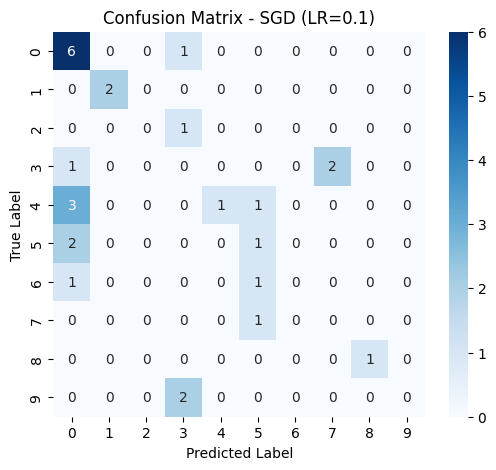

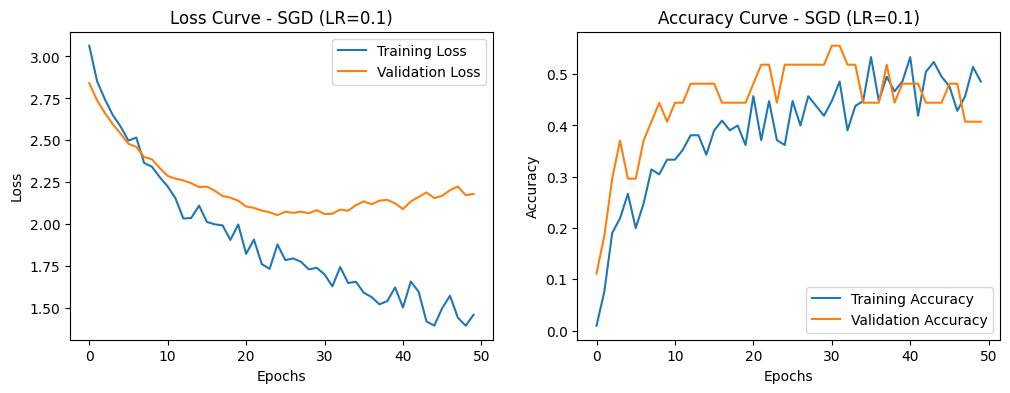

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 182ms/step
Optimizer: RMSprop, Learning Rate: 0.001
              precision    recall  f1-score   support

           0       0.46      0.86      0.60         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           8       0.20      0.33      0.25         3
          11       0.00      0.00      0.00         2
          13       1.00      1.00      1.00         1
          14       0.50      1.00      0.67         1
          17       0.00      0.00      0.00         2

    accuracy                           0.41        27
   macro avg       0.32      0.42      0.35        27
weighted avg       0.27      0.41      0.32        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


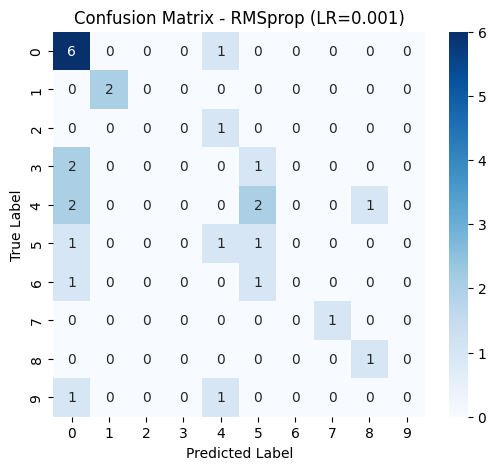

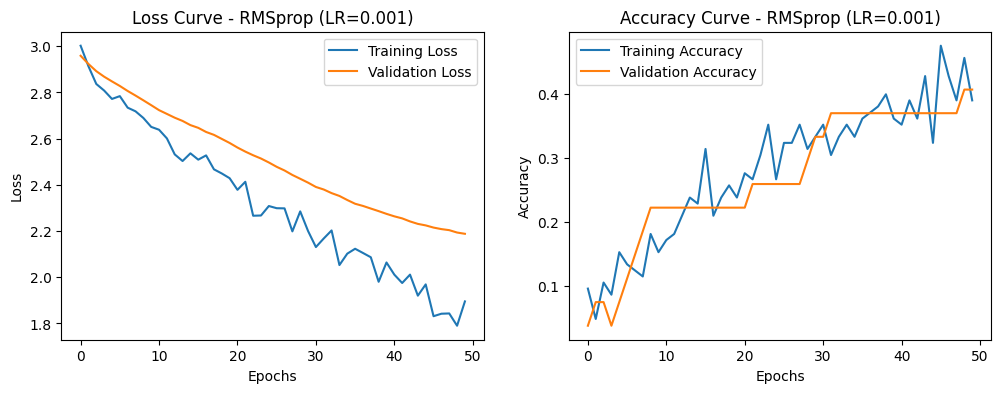

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 180ms/step
Optimizer: RMSprop, Learning Rate: 0.01
              precision    recall  f1-score   support

           0       0.62      0.71      0.67         7
           1       1.00      1.00      1.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.50      0.20      0.29         5
           5       0.00      0.00      0.00         0
           8       1.00      0.33      0.50         3
           9       0.00      0.00      0.00         0
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.50      1.00      0.67         1
          17       1.00      0.50      0.67         2

    accuracy                           0.41        27
   macro avg       0.39      0.31      0.32        27
weighted avg       0.53      0.41      0.43        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

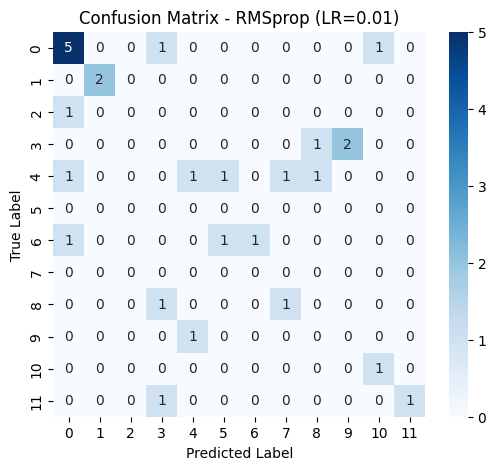

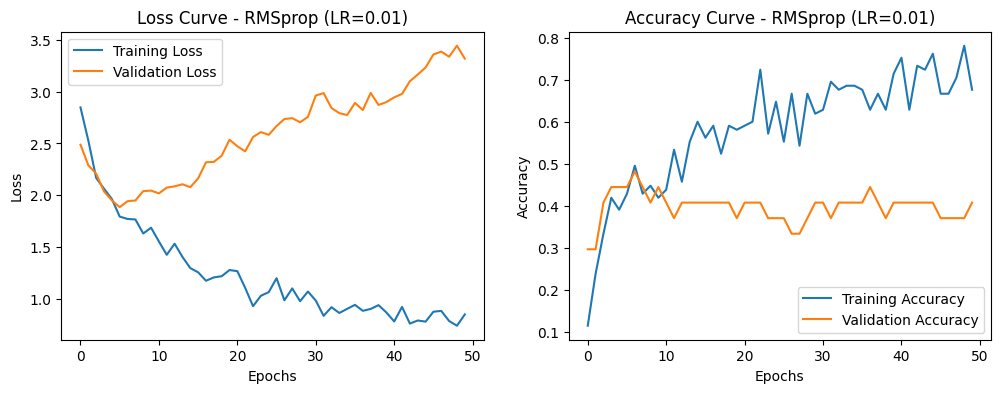

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 531ms/step
Optimizer: RMSprop, Learning Rate: 0.1
              precision    recall  f1-score   support

           0       0.29      1.00      0.45         7
           1       0.00      0.00      0.00         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           5       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.00      0.00      0.00         2

    accuracy                           0.26        27
   macro avg       0.03      0.09      0.04        27
weighted avg       0.08      0.26      0.12        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

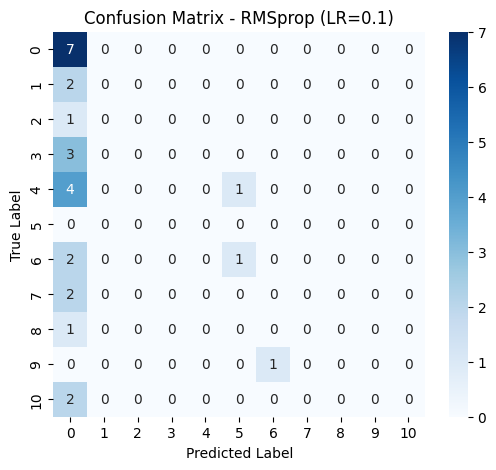

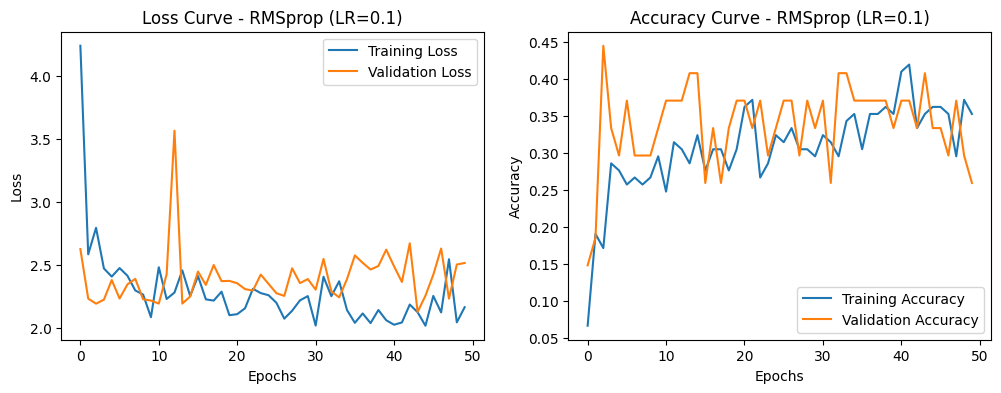

In [ ]:
# Training loop
for opt in optimizers:
    for lr in learning_rates:
        with strategy.scope():
            model = Sequential([
                Input(shape=(X_train.shape[1],)),
                Dense(32, activation='relu'),
                Dropout(0.2),
                Dense(16, activation='relu'),
                Dropout(0.2),
                Dense(num_classes, activation='softmax')
            ])
            optimizer = opt(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train, y_train, epochs=50, validation_data=(X_test, y_test), verbose=0)
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)
            acc = accuracy_score(y_test_classes, y_pred_classes)
            prec = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
            rec = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
            conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
            results.append([opt.__name__, lr, acc, prec, rec, f1])

            # Print classification report
            print(f"Optimizer: {opt.__name__}, Learning Rate: {lr}")
            print(classification_report(y_test_classes, y_pred_classes))

            # Plot confusion matrix
            plt.figure(figsize=(6, 5))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title(f'Confusion Matrix - {opt.__name__} (LR={lr})')
            plt.show()

            # Plot training history
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title(f'Loss Curve - {opt.__name__} (LR={lr})')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.title(f'Accuracy Curve - {opt.__name__} (LR={lr})')
            plt.legend()
            plt.show()

In [ ]:
# Comparative table
results_df = pd.DataFrame(results, columns=['Optimizer', 'Learning Rate', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_df)

   Optimizer  Learning Rate  Accuracy  Precision    Recall  F1-Score
0       Adam          0.001  0.370370        NaN       NaN       NaN
1       Adam          0.010  0.407407        NaN       NaN       NaN
2       Adam          0.100  0.296296        NaN       NaN       NaN
3        SGD          0.001  0.074074        NaN       NaN       NaN
4        SGD          0.010  0.259259        NaN       NaN       NaN
5        SGD          0.100  0.407407        NaN       NaN       NaN
6    RMSprop          0.001  0.407407        NaN       NaN       NaN
7    RMSprop          0.010  0.333333        NaN       NaN       NaN
8    RMSprop          0.100  0.296296        NaN       NaN       NaN
9       Adam          0.001  0.481481   0.330864  0.481481  0.359163
10      Adam          0.010  0.370370   0.306173  0.370370  0.333333
11      Adam          0.100  0.370370   0.186728  0.370370  0.228196
12       SGD          0.001  0.000000   0.000000  0.000000  0.000000
13       SGD          0.010  0.370

### Improving accuracy by changing number of Epochs and Learning rate.

In [ ]:
# Model training settings
optimizers = [Adam]
learning_rates = [0.0001]
results = []

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 208ms/step
Optimizer: Adam, Learning Rate: 0.0001
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         7
           1       0.50      0.50      0.50         2
           2       0.00      0.00      0.00         1
           3       0.00      0.00      0.00         3
           4       0.00      0.00      0.00         5
           7       0.00      0.00      0.00         0
           8       0.00      0.00      0.00         3
          11       0.00      0.00      0.00         2
          13       0.00      0.00      0.00         1
          14       0.00      0.00      0.00         1
          17       0.25      0.50      0.33         2

    accuracy                           0.07        27
   macro avg       0.07      0.09      0.08        27
weighted avg       0.06      0.07      0.06        27



/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_

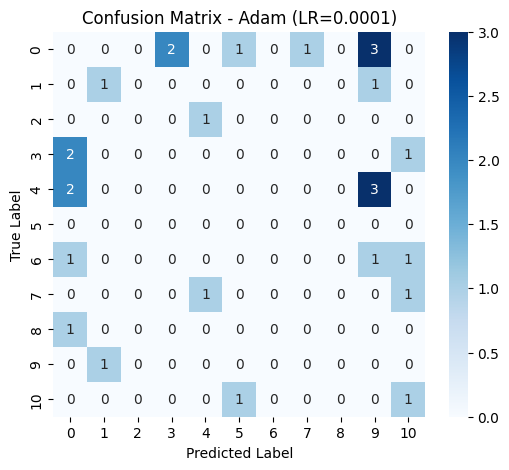

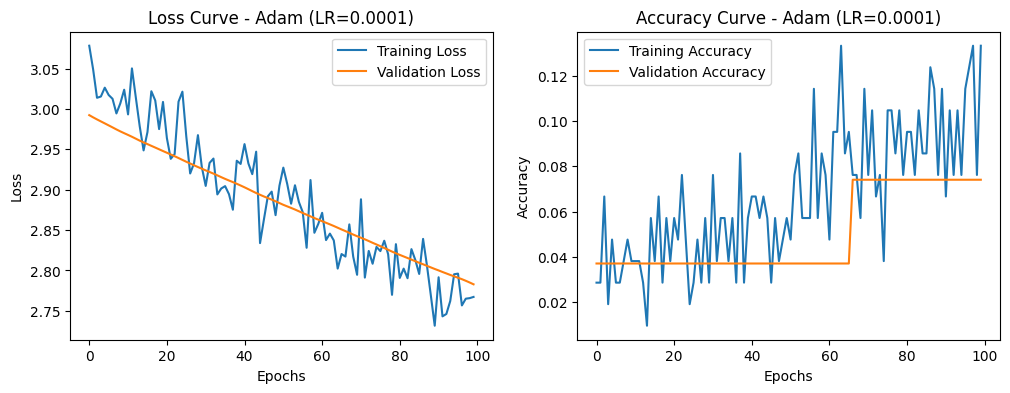

In [ ]:
# Training loop
for opt in optimizers:
    for lr in learning_rates:
        with strategy.scope():
            model = Sequential([
                Input(shape=(X_train.shape[1],)),
                Dense(32, activation='relu'),
                Dropout(0.2),
                Dense(16, activation='relu'),
                Dropout(0.2),
                Dense(num_classes, activation='softmax')
            ])
            optimizer = opt(learning_rate=lr)
            model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])
            history = model.fit(X_train, y_train, epochs=100, validation_data=(X_test, y_test), verbose=0)
            y_pred = model.predict(X_test)
            y_pred_classes = np.argmax(y_pred, axis=1)
            y_test_classes = np.argmax(y_test, axis=1)
            acc = accuracy_score(y_test_classes, y_pred_classes)
            prec = precision_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
            rec = recall_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
            f1 = f1_score(y_test_classes, y_pred_classes, average='weighted', zero_division=0)
            conf_matrix = confusion_matrix(y_test_classes, y_pred_classes)
            results.append([opt.__name__, lr, acc, prec, rec, f1])

            # Print classification report
            print(f"Optimizer: {opt.__name__}, Learning Rate: {lr}")
            print(classification_report(y_test_classes, y_pred_classes))

            # Plot confusion matrix
            plt.figure(figsize=(6, 5))
            sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
            plt.xlabel('Predicted Label')
            plt.ylabel('True Label')
            plt.title(f'Confusion Matrix - {opt.__name__} (LR={lr})')
            plt.show()

            # Plot training history
            plt.figure(figsize=(12, 4))
            plt.subplot(1, 2, 1)
            plt.plot(history.history['loss'], label='Training Loss')
            plt.plot(history.history['val_loss'], label='Validation Loss')
            plt.xlabel('Epochs')
            plt.ylabel('Loss')
            plt.title(f'Loss Curve - {opt.__name__} (LR={lr})')
            plt.legend()

            plt.subplot(1, 2, 2)
            plt.plot(history.history['accuracy'], label='Training Accuracy')
            plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
            plt.xlabel('Epochs')
            plt.ylabel('Accuracy')
            plt.title(f'Accuracy Curve - {opt.__name__} (LR={lr})')
            plt.legend()
            plt.show()

In [ ]:
# Comparative table
results_df = pd.DataFrame(results, columns=['Optimizer', 'Learning Rate', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])
print(results_df)

  Optimizer  Learning Rate  Accuracy  Precision    Recall  F1-Score
0      Adam         0.0001  0.074074   0.055556  0.074074  0.061728
